### Imports

In [1]:
import numpy as _np
import matplotlib.pyplot as _plt
import pandas as _pd
import glob as _gl
import pymad8 as _m8
import pybdsim as _bd
import beamNeedle
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy import integrate

Welcome to JupyROOT 6.29/01


### Date and prefix

In [2]:
date = "2023_08_21"
save_name_prefix = "plots/BeamNeedle/" + date + "_T20_plot"

# Numerical convolutions and integral

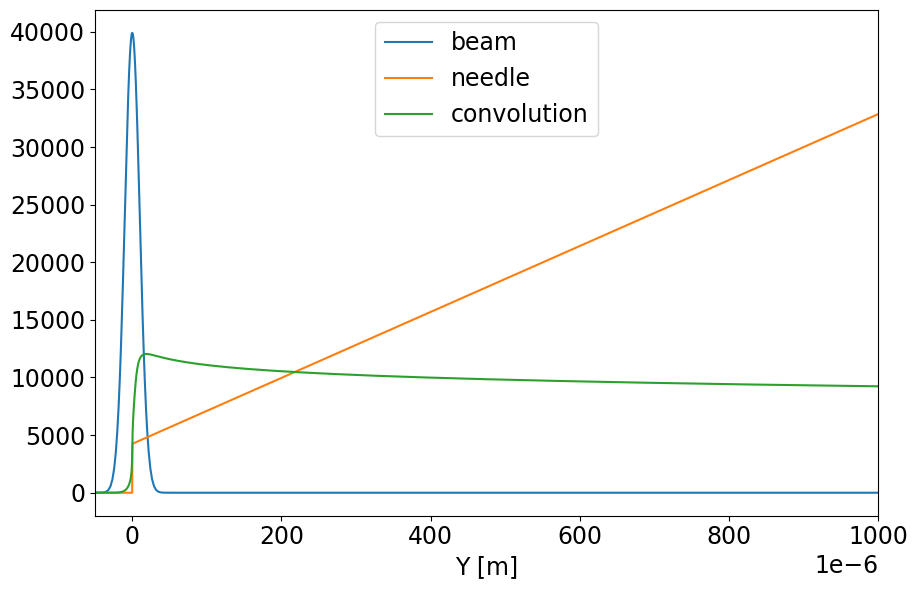

In [4]:
beamNeedle.PlotConvolutionExampleNeedle(a=1, c=1e2, A=1e1, sigma=10e-6, R1=7e-6, R2=125e-6, length=2.5e-3)
_plt.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
_plt.xlim(-5e-5,1e-3)
_plt.xlabel("Y [m]")
_plt.savefig("{}_convolution_example_needle".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

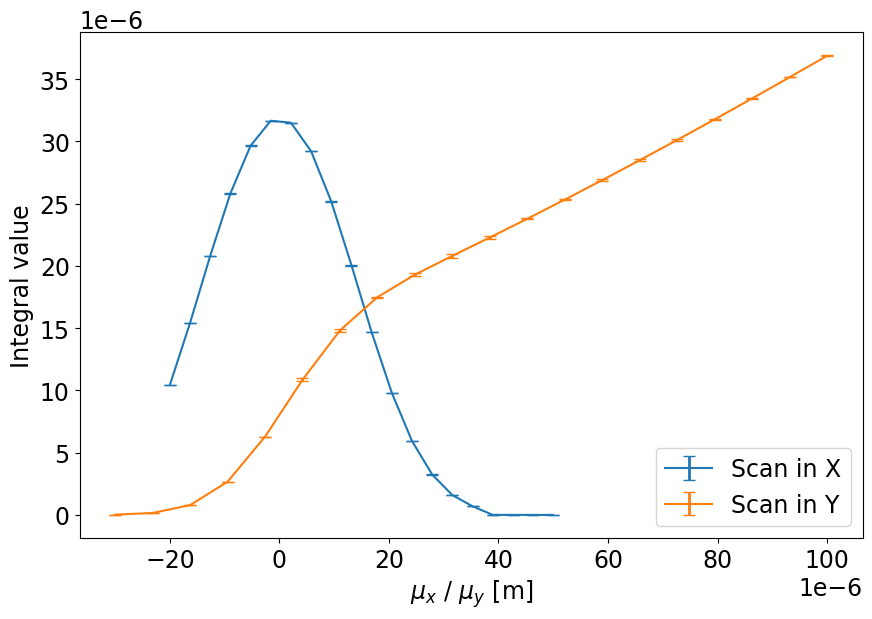

In [5]:
beamNeedle.plotOptions()

beamNeedle.plot_numerical_needle_scan(param='mux', scan_min=-20e-6, scan_max=50e-6, 
                                    a=1, b=5e-1, muy=2e-4, sigmax=10e-6, sigmay=10e-6, length=2.5e-3, R1=125e-6, R2=7e-6, nbpts=20, color="C0", label='Scan in X')
beamNeedle.plot_numerical_needle_scan(param='muy', scan_min=-30e-6, scan_max=100e-6, 
                                    sigmax=10e-6, sigmay=10e-6, length=2.5e-3, R1=125e-6, R2=7e-6, nbpts=20, color="C1", label='Scan in Y')
#beamNeedle.plot_numerical_needle_scan(param='muy', scan_min=35e-6, scan_max=1000e-6, 
#                                    sigmax=10e-6, sigmay=10e-6, length=2.5e-3, R1=125e-6, R2=7e-6, nbpts=50, color="C1", label='Scan in Y')
#beamNeedle.plot_numerical_needle_scan(param='muy', scan_min=24e-6, scan_max=35e-6, 
#                                    sigmax=10e-6, sigmay=10e-6, length=2.5e-3, R1=125e-6, R2=7e-6, nbpts=20, color="C1", label='Scan in Y')

_plt.xlabel(r'$\mu_x$ / $\mu_y$ [m]')
_plt.ticklabel_format(axis='both', style='sci', scilimits=(-6,-6))
_plt.savefig("{}_x_y_needle_scan_using_integral".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

# Needle geometry

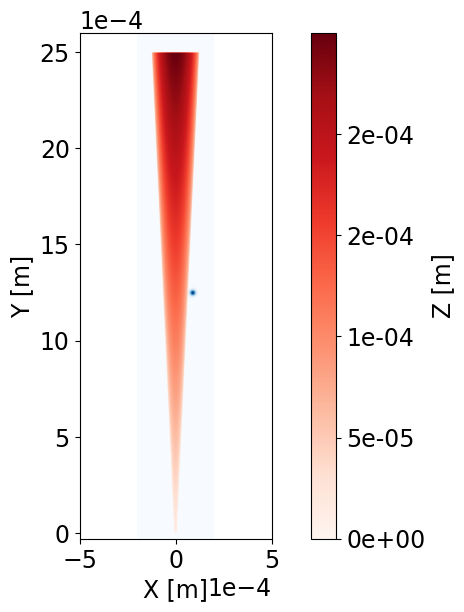

In [72]:
beamNeedle.plotOptions()

beamNeedle.plot_gauss_needle_integral(sigmax=10e-6, sigmay=10e-6, mux=90e-6, muy=1.25e-3, length=2.5e-3, R1=125e-6, R2=7e-6, 
                                    xmin=-200e-6, xmax=200e-6, ymin=-30e-6, ymax=2.6e-3, nbins = 1000)

_plt.ticklabel_format(axis='both', style='sci', scilimits=(-4,-4))
_plt.colorbar(label = "Z [m]", format="%1.e")
_plt.xlim(-5e-4,5e-4)
_plt.title("")
_plt.savefig("{}_integral_plot_needle_and_beam".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

# Create gmad files sets

In [9]:
#beamNeedle.GenerateSetGmadFiles(tag="T20_wire_fullline", wireOffsetX='+1.00')

In [5]:
beamNeedle.GenerateSetGmadFiles(tag="TL-T20-FF_needle", needleOffsetX='+0.00e-5', needleOffsetY='+0.00e-3', xsecfact='1e0',
                                #alfx=0.523492, alfy=-5.374594, betx=1.219804, bety=28.061506, 
                                #dispx=0.144685, dispxp=-0.039822, dispy=-0.004589, dispyp=-0.002385,
                                #sigmaE=1.377e-5, line='l7'
                               )

'TL-T20-FF_needle_X_+0.00e-5_Y_+0.00e-3'

In [8]:
beamNeedle.GenerateAllGmadFilesAndList(tag="T20_needle", tagfilename='tagfilelistneedleX', valuetoscan='needleOffsetX', 
                                       valuelist=beamNeedle.GenerateLinearListValuesStr(minValue=-9, maxValue=9, nbpts=31, nbDecimals=2, exponant=-5), 
                                       xsecfact='1e0', needleOffsetY='+0.00e-3',
                                       alfx=0.523492, alfy=-5.374594, betx=1.219804, bety=28.061506, 
                                       dispx=0.144685, dispxp=-0.039822, dispy=-0.004589, dispyp=-0.002385,
                                       sigmaE=1.377e-5, line='l7')

File names written in tagfilelistneedleX


In [9]:
beamNeedle.GenerateAllGmadFilesAndList(tag="T20_needle", tagfilename='tagfilelistneedleY', valuetoscan='needleOffsetY', 
                                       valuelist=beamNeedle.GenerateLinearListValuesStr(minValue=-1.5, maxValue=0, nbpts=31, nbDecimals=2, exponant=-3), 
                                       xsecfact='1e0', needleOffsetX='+0.00e-5',
                                       alfx=0.523492, alfy=-5.374594, betx=1.219804, bety=28.061506, 
                                       dispx=0.144685, dispxp=-0.039822, dispy=-0.004589, dispyp=-0.002385,
                                       sigmaE=1.377e-5, line='l7')

File names written in tagfilelistneedleY


# BDSIM run and Python analysis

In [5]:
#beamNeedle.runOneOffset("../03_bdsimModel/T20_needle_X_+0.00e-5_Y_+0.00e-3.gmad", npart=500, seed=None, silent=False)
#beamNeedle.runOneOffset("../03_bdsimModel/TEST_T20_wire_offset_+0.00_bias_1e0.gmad", npart=10000, seed=0, silent=False)
beamNeedle.runOneOffset("../03_bdsimModel/TL-T20-FF_needle_X_+0.00e-5_Y_+0.00e-3.gmad", npart=90000, seed=0, silent=True)
beamNeedle.analysis('../04_dataLocal/90000_part_TL-T20-FF_needle_X_+0.00e-5_Y_+0.00e-3.root', sampler="D008.")

BDSIM output file - using DataLoader
File : ../04_dataLocal/90000_part_TL-T20-FF_needle_X_+0.00e-5_Y_+0.00e-3.root  / Nb of entries =  90000


In [4]:
#beamNeedle.runScanOffset(tagfilename="tagfilelistneedleX", npart=500, seed=None, silent=True)

In [10]:
#beamNeedle.analysis(_gl.glob('../04_dataLocal/10000_part_T20_wire_offset_[-+]0.[0-1][0-9][0-9]_bias_1e0.root'))
#beamNeedle.analysis(_gl.glob('../04_dataLocal/20000_part_T20_needle_X_+0.00e-5*.root'))

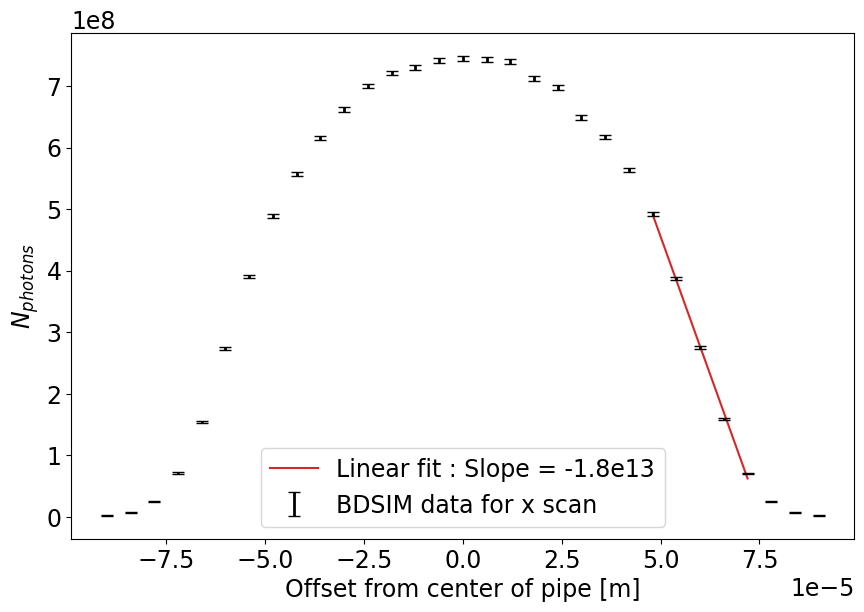

In [67]:
beamNeedle.PlotIntegralNeedle('../06_analysis/T20_needle_*Y_+0.00e-3_merged_hist.root', 'PHOTONS_E', 'X', 
                              a=None, sigmax=10e-6, sigmay=10e-6, mux=0, muy=0, b=None, length=1e-3, R1=7e-6, R2=125e-6,
                              manualFit=False, autoFit=False, autoFitFixed=False, linFit=True, fitRange=[4.5e-5, 7.5e-5])
#_plt.xlim(0,8e-5)
_plt.legend(["Linear fit : Slope = -1.8e13", "BDSIM data for x scan"], prop={'size': 17}, loc=8)
_plt.savefig("{}_photon_beam_X_scan_and_fit".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

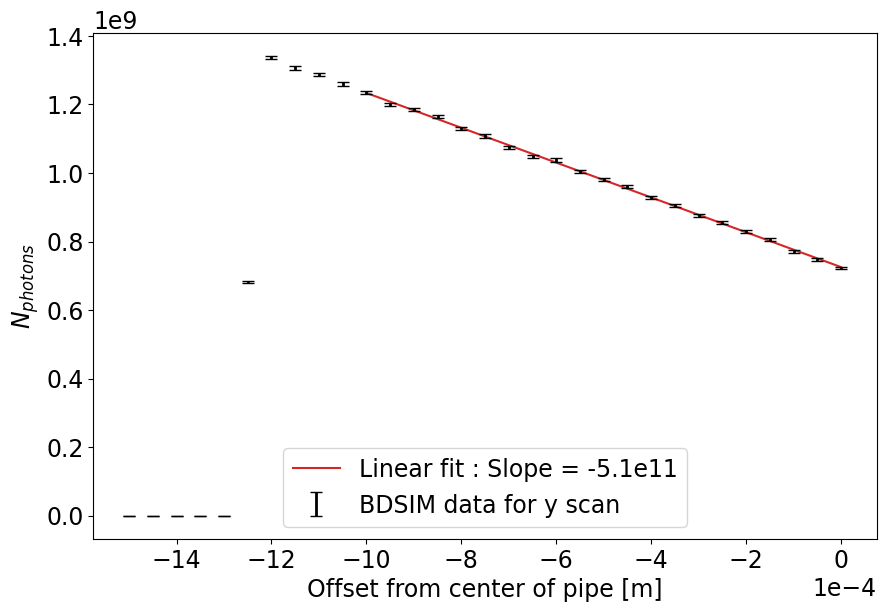

In [68]:
beamNeedle.PlotIntegralNeedle('../06_analysis/T20_needle_X_+0.00e-5*_merged_hist.root', 'PHOTONS_R', 'Y', 
                              a=None, sigmax=10e-6, sigmay=10e-6, mux=0, muy=0, b=None, length=1e-3, R1=7e-6, R2=125e-6,
                              manualFit=False, autoFit=False, autoFitFixed=False, linFit=True, fitRange=[-1e-3, 0])

_plt.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))
_plt.legend(["Linear fit : Slope = -5.1e11", "BDSIM data for y scan"], prop={'size': 17}, loc=8)
_plt.savefig("{}_photon_beam_Y_scan_and_fit".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

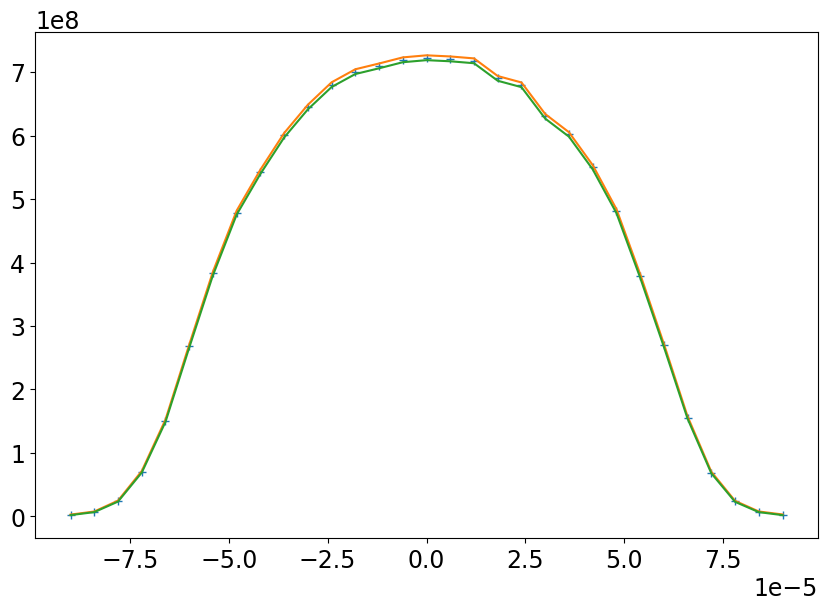

In [25]:
OFFSETS, NPHOTONS, ERRORS = beamNeedle.countPhotonsInHistAllFiles('../06_analysis/T20_needle_*Y_+0.00e-3_merged_hist.root', 'PHOTONS_R', 'X')
beamNeedle.plotOptions()
_plt.plot(OFFSETS, NPHOTONS, '+')
_plt.plot(OFFSETS, NPHOTONS+ERRORS)
_plt.plot(OFFSETS, NPHOTONS-ERRORS)